K-means clustering

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
import itertools
from sklearn.preprocessing import StandardScaler
import seaborn as sns

warnings.filterwarnings("ignore")

# folder za cuvanje slika
save_folder = "kmeans images k4 PROSIRENO"
os.makedirs(save_folder, exist_ok=True)


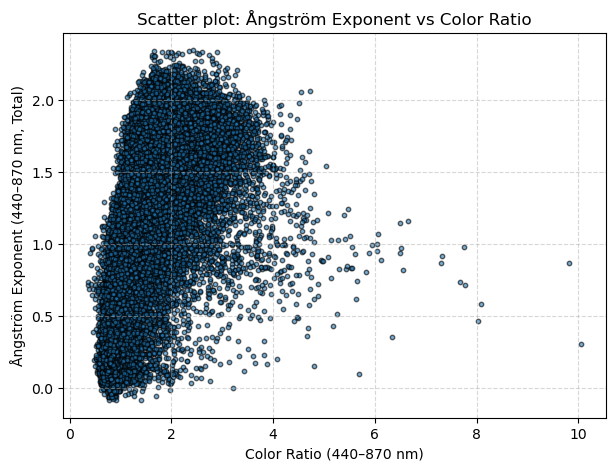

In [4]:
# provera zavisnosti angstrom exponent od color ratio

file_path = "AllStations_4params_with_station.ods"
df = pd.read_excel(file_path, engine="odf")

color_ratio = df["Color Ratio[440-870]"]
angstrom_exp = df["Extinction_Angstrom_Exponent_440-870nm-Total"]

plt.figure(figsize=(7,5))
plt.scatter(color_ratio, angstrom_exp, s=10, alpha=0.6, edgecolor='k')

plt.xlabel("Color Ratio (440–870 nm)")
plt.ylabel("Ångström Exponent (440–870 nm, Total)")
plt.title("Scatter plot: Ångström Exponent vs Color Ratio")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


In [1]:
!pip install odfpy scikit-learn matplotlib pandas plotly

In [2]:
!pip install seaborn

Dimenzije: (49487, 4)
Prvih 5 redova:


,Extinction_Angstrom_Exponent_440-870nm-Total,Single_Scattering_Albedo[440nm],Refractive_Index-Real_Part[440nm],Color Ratio[440-870]
0,1.933810,0.9566,1.4094,1.765295
1,1.843452,0.9900,1.4335,1.684405
2,1.805762,0.9935,1.4011,1.949773
3,1.781239,0.9895,1.4366,1.562015
4,2.008488,0.9951,1.4514,1.706433



Osnovna statistika:


,Extinction_Angstrom_Exponent_440-870nm-Total,Single_Scattering_Albedo[440nm],Refractive_Index-Real_Part[440nm],Color Ratio[440-870]
count,49487.000000,49487.000000,49487.000000,49487.000000
mean,1.107367,0.914520,1.498396,1.442054
std,0.630821,0.048607,0.065467,0.633576
min,-0.082898,0.466500,1.330000,0.359184
25%,0.500425,0.887950,1.455800,0.922478
50%,1.207846,0.916900,1.497400,1.361251
75%,1.691796,0.948500,1.547000,1.736830
max,2.345562,0.996800,1.600000,10.055167


ima li nan vrednosti: False
dimenzije podataka: (49487, 4)

Skewness svakog atributa:
Extinction_Angstrom_Exponent_440-870nm-Total   -0.187543
Single_Scattering_Albedo[440nm]                -0.939057
Refractive_Index-Real_Part[440nm]              -0.305031
Color Ratio[440-870]                            1.647993
dtype: float64
Broj iteracija za k = 2 : 9
Broj iteracija za k = 3 : 9
Broj iteracija za k = 4 : 15
Broj iteracija za k = 5 : 13
Broj iteracija za k = 6 : 15
Broj iteracija za k = 7 : 20
Broj iteracija za k = 8 : 25
Broj iteracija za k = 9 : 31
Broj iteracija za k = 10 : 37


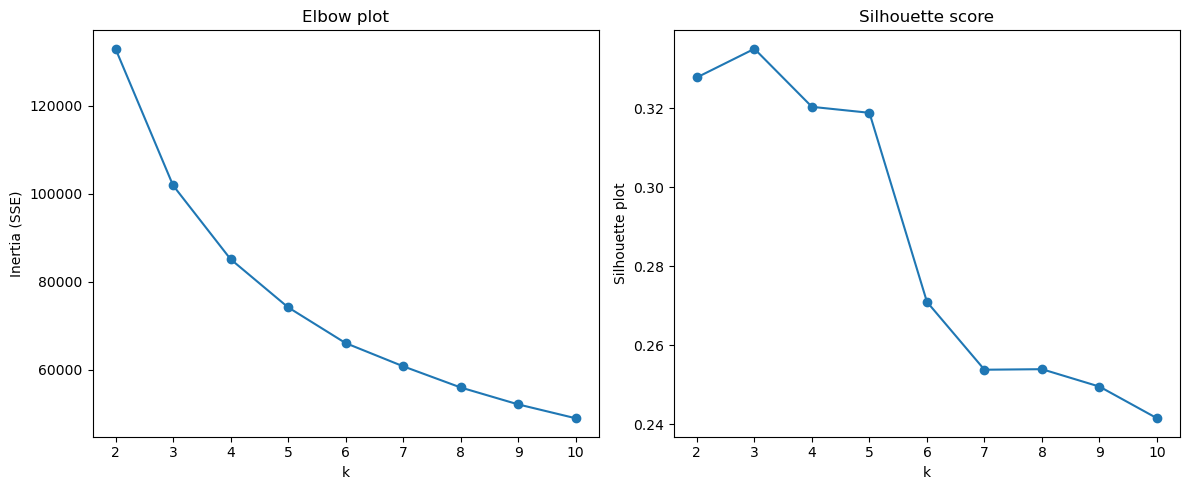

Inertias: [(2, np.float64(132966.4)), (3, np.float64(101932.62)), (4, np.float64(85166.3)), (5, np.float64(74226.67)), (6, np.float64(66097.63)), (7, np.float64(60828.8)), (8, np.float64(56014.42)), (9, np.float64(52168.45)), (10, np.float64(49014.78))]
Silhouette: [(2, np.float64(0.328)), (3, np.float64(0.335)), (4, np.float64(0.32)), (5, np.float64(0.319)), (6, np.float64(0.271)), (7, np.float64(0.254)), (8, np.float64(0.254)), (9, np.float64(0.25)), (10, np.float64(0.242))]
Broj iteracija za finalni model: 14

Broj clanova po klasteru:
cluster
0    11282
1    19230
2    10715
3     8260
Name: count, dtype: int64

Centri klastera (u originalnim jedinicama):


,Extinction_Angstrom_Exponent_440-870nm-Total,Single_Scattering_Albedo[440nm],Refractive_Index-Real_Part[440nm],Color Ratio[440-870]
0,1.542419,0.936847,1.540871,2.142801
1,0.436272,0.911903,1.491916,0.924152
2,1.676606,0.948435,1.423906,1.606082
3,1.335304,0.846011,1.552182,1.476414



=== Statistika za klaster 0 ===


,Parametar,Median,Mean ± Std,Mode (Value of maximum frequency),Range
0,Extinction_Angstrom_Exponent_440-870nm-Total,1.577,1.54 ± 0.33,1.111,-0.00 – 2.35
1,Single_Scattering_Albedo[440nm],0.937,0.94 ± 0.03,0.933,0.78 – 1.00
2,Refractive_Index-Real_Part[440nm],1.539,1.54 ± 0.04,1.600,1.41 – 1.60
3,Color Ratio[440-870],1.987,2.14 ± 0.71,0.843,0.84 – 10.06



=== Statistika za klaster 1 ===


,Parametar,Median,Mean ± Std,Mode (Value of maximum frequency),Range
0,Extinction_Angstrom_Exponent_440-870nm-Total,0.383,0.44 ± 0.28,0.114,-0.08 – 1.39
1,Single_Scattering_Albedo[440nm],0.910,0.91 ± 0.03,0.908,0.76 – 0.99
2,Refractive_Index-Real_Part[440nm],1.487,1.49 ± 0.05,1.600,1.33 – 1.60
3,Color Ratio[440-870],0.880,0.92 ± 0.19,0.448,0.45 – 2.26



=== Statistika za klaster 2 ===


,Parametar,Median,Mean ± Std,Mode (Value of maximum frequency),Range
0,Extinction_Angstrom_Exponent_440-870nm-Total,1.720,1.68 ± 0.27,1.807,0.04 – 2.34
1,Single_Scattering_Albedo[440nm],0.953,0.95 ± 0.03,0.994,0.79 – 1.00
2,Refractive_Index-Real_Part[440nm],1.430,1.42 ± 0.05,1.330,1.33 – 1.53
3,Color Ratio[440-870],1.568,1.61 ± 0.32,0.773,0.77 – 3.47



=== Statistika za klaster 3 ===


,Parametar,Median,Mean ± Std,Mode (Value of maximum frequency),Range
0,Extinction_Angstrom_Exponent_440-870nm-Total,1.378,1.34 ± 0.43,0.513,0.03 – 2.16
1,Single_Scattering_Albedo[440nm],0.855,0.85 ± 0.05,0.858,0.47 – 0.93
2,Refractive_Index-Real_Part[440nm],1.562,1.55 ± 0.05,1.600,1.33 – 1.60
3,Color Ratio[440-870],1.459,1.48 ± 0.42,0.359,0.36 – 7.33


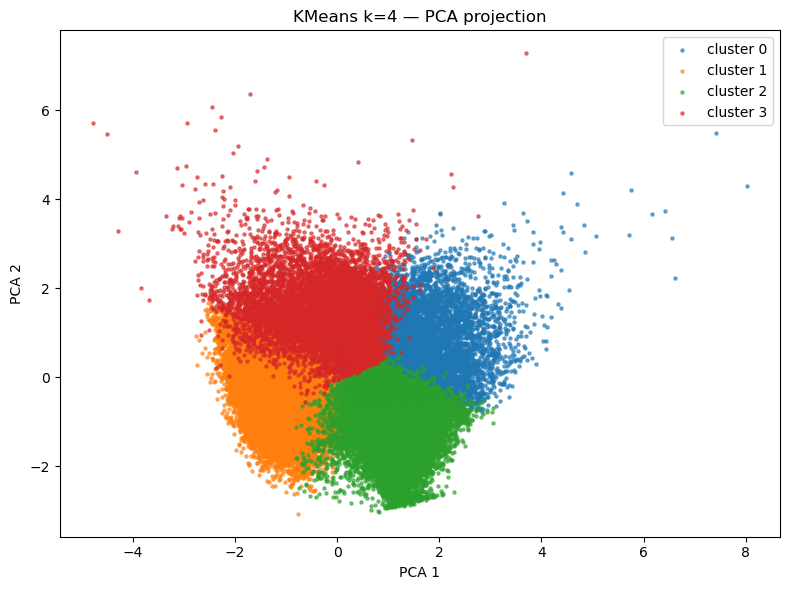

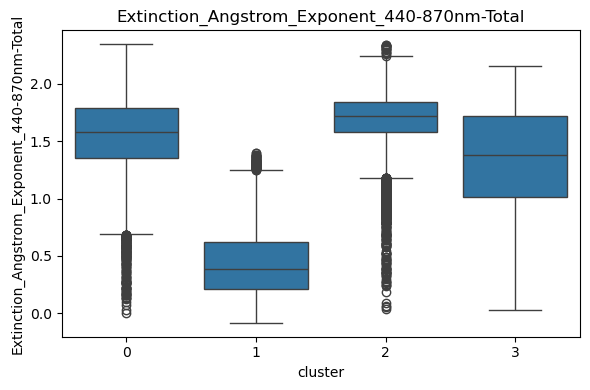

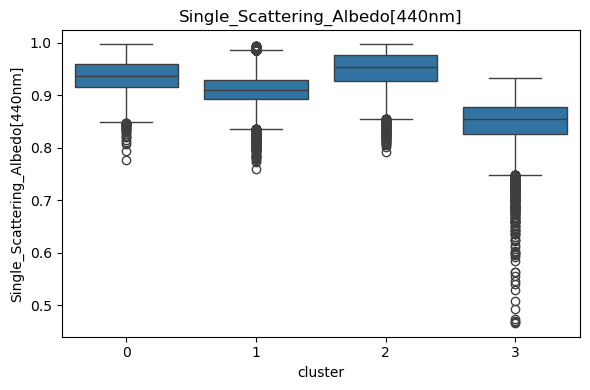

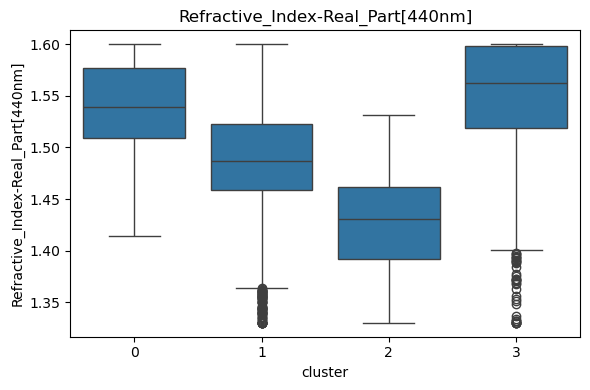

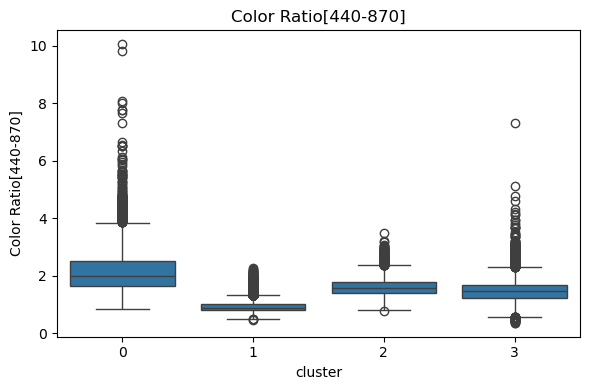


snimljeno: kmeans4paramAllStations.ods


In [5]:
# UCITAVANJE
fn = "AllStations_4params_with_station.ods"
# headers su u prvom redu
df = pd.read_excel(fn, engine="odf")

cols = [
    "Extinction_Angstrom_Exponent_440-870nm-Total",
    "Single_Scattering_Albedo[440nm]",
    "Refractive_Index-Real_Part[440nm]",
    "Color Ratio[440-870]"
]

# provera da li kolone postoje
missing = [c for c in cols if c not in df.columns]
if missing:
    raise KeyError(f"Nedostaju kolone u fajlu: {missing}")

data = df[cols].copy()
print("Dimenzije:", data.shape)
print("Prvih 5 redova:")
display(data.head())

# brza EDA (Exploratory Data Analysis)
print("\nOsnovna statistika:")
display(data.describe())

# provera da li postoje nan
print("ima li nan vrednosti:", data.isna().any().any())

# kopija podataka za dalju obradu
data_clean = data.copy()
print("dimenzije podataka:", data_clean.shape)

# opcionalna transformacija: proveri raspodelu (skewness)
print("\nSkewness svakog atributa:")
print(data_clean.skew())

# skaliranje
scaler = StandardScaler()
X = scaler.fit_transform(data_clean.values)

# odabir k (elbow + silhouette)
ks = list(range(2, 11))
inertias = []
sil_scores = []

for k in ks:
    kmeans = KMeans(n_clusters=k, n_init=20, random_state=42, max_iter=500)
    labels = kmeans.fit_predict(X)
    print("Broj iteracija za k =", k, ":", kmeans.n_iter_)
    inertias.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X, labels))

    
# plot elbow i silhouette
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(ks, inertias, '-o')
plt.xlabel('k')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow plot')

plt.subplot(1,2,2)
plt.plot(ks, sil_scores, '-o')
plt.xlabel('k')
plt.ylabel('Silhouette plot')
plt.title('Silhouette score')
plt.tight_layout()

elbow_silhouette_fig = f"Elbow_plot_and_Silhouette_score_k4.png"
plt.savefig(os.path.join(save_folder, elbow_silhouette_fig), dpi=300)

plt.show()

print("Inertias:", list(zip(ks, np.round(inertias,2))))
print("Silhouette:", list(zip(ks, np.round(sil_scores,3))))

# pokretanje KMeans sa izabranim k
k_chosen = 4

kmeans = KMeans(n_clusters=k_chosen, n_init=50, random_state=42, max_iter=1000)
labels = kmeans.fit_predict(X)
print("Broj iteracija za finalni model:", kmeans.n_iter_)
data_clean = data_clean.reset_index(drop=True)
data_clean['cluster'] = labels

# osnovne informacije o klasterima
print("\nBroj clanova po klasteru:")
print(data_clean['cluster'].value_counts().sort_index())

# centri u originalnom skaliranom prostoru i vraćeni u originalnu metriku:
centers_scaled = kmeans.cluster_centers_
centers_orig = scaler.inverse_transform(centers_scaled)
centers_df = pd.DataFrame(centers_orig, columns=cols)
print("\nCentri klastera (u originalnim jedinicama):")
display(centers_df)



# statistika po klasterima, reorganizovano po klasterima
cluster_stats = {}

for cl in sorted(data_clean["cluster"].unique()):
    rows = []
    for c in cols:
        vals = data_clean.loc[data_clean["cluster"] == cl, c]
        mean = vals.mean()
        std = vals.std()
        median = vals.median()
        minv = vals.min()
        maxv = vals.max()
        r = maxv - minv
        mode_vals = vals.mode()
        mode_val = mode_vals.iloc[0] if not mode_vals.empty else np.nan

        rows.append({
            "Parametar": c,
            "Median": round(median, 3),
            "Mean ± Std": f"{mean:.2f} ± {std:.2f}",
            "Mode (Value of maximum frequency)": round(mode_val, 3),
            "Range": f"{minv:.2f} – {maxv:.2f}"
        })
    cluster_stats[cl] = pd.DataFrame(rows)

# prikaz za svaki klaster
for cl, tbl in cluster_stats.items():
    print(f"\n=== Statistika za klaster {cl} ===")
    display(tbl)




# vizualizacija (PCA u 2D)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
for c in sorted(data_clean['cluster'].unique()):
    mask = data_clean['cluster'] == c
    plt.scatter(X_pca[mask,0], X_pca[mask,1], label=f'cluster {c}', alpha=0.6, s=5)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title(f'KMeans k={k_chosen} — PCA projection')
plt.legend()
plt.tight_layout()

pca_filename = f"PCA_k{k_chosen}.png"
plt.savefig(os.path.join(save_folder, pca_filename), dpi=300)

plt.show()

# boxplot po klasterima — korisno za interpretaciju
for col in cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='cluster', y=col, data=data_clean)
    plt.title(f'{col}')
    plt.tight_layout()
    boxplot_filename = f"Boxplot_{col.replace(' ', '_').replace('[','').replace(']','')}_k{k_chosen}.png"
    plt.savefig(os.path.join(save_folder, boxplot_filename), dpi=300)
    
    plt.show()

# snimanje rezultata 
# sacuvaj samo originalne kolone plus klaster u novi .ods
output_fn = "kmeans4paramAllStations.ods"
data_with_clusters = df.loc[data_clean.index, :].copy()  # preuzimamo odgovarajuce originalne redove
data_with_clusters['cluster'] = data_clean['cluster'].values
data_with_clusters.to_excel(output_fn, engine="odf", index=False)
print(f"\nsnimljeno: {output_fn}")


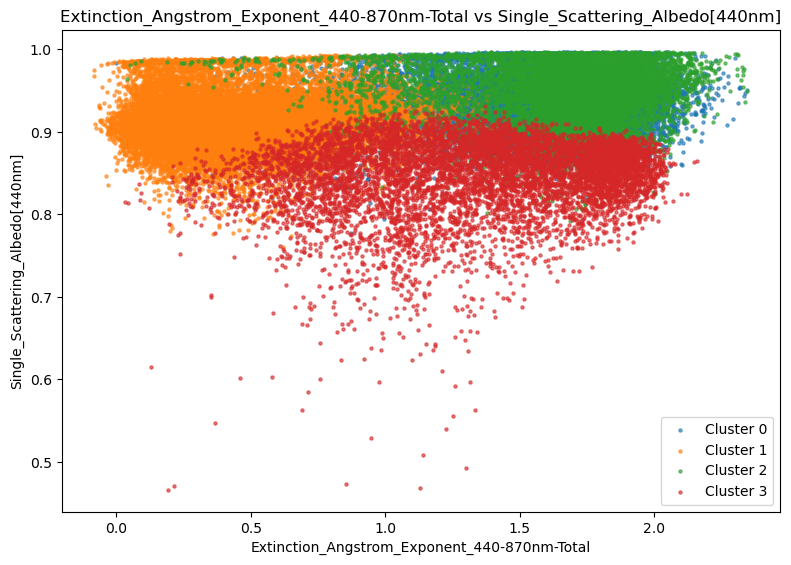

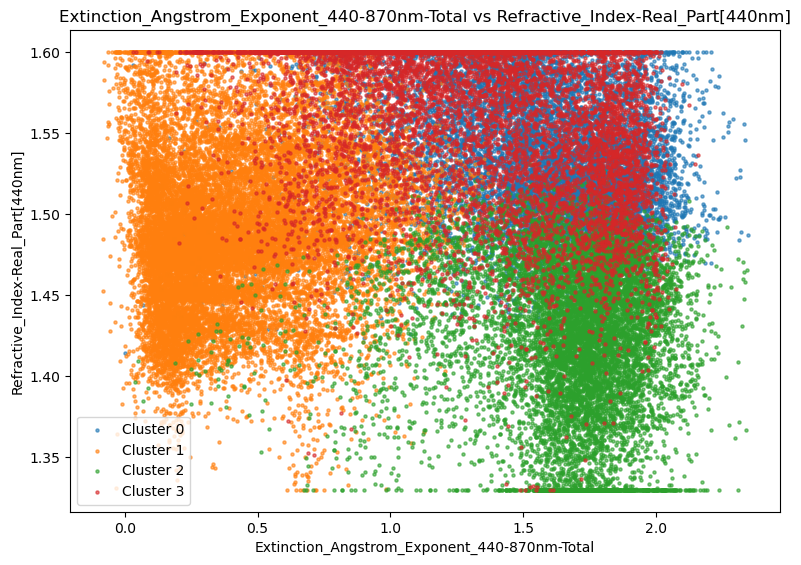

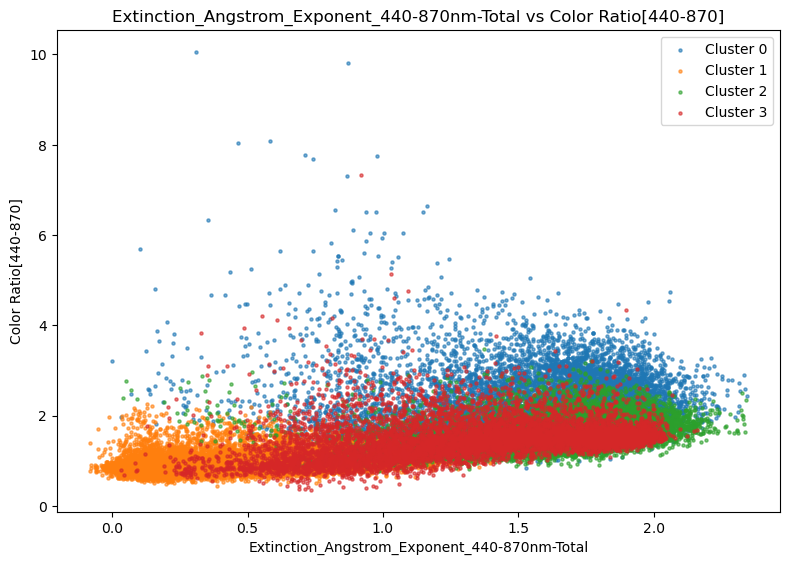

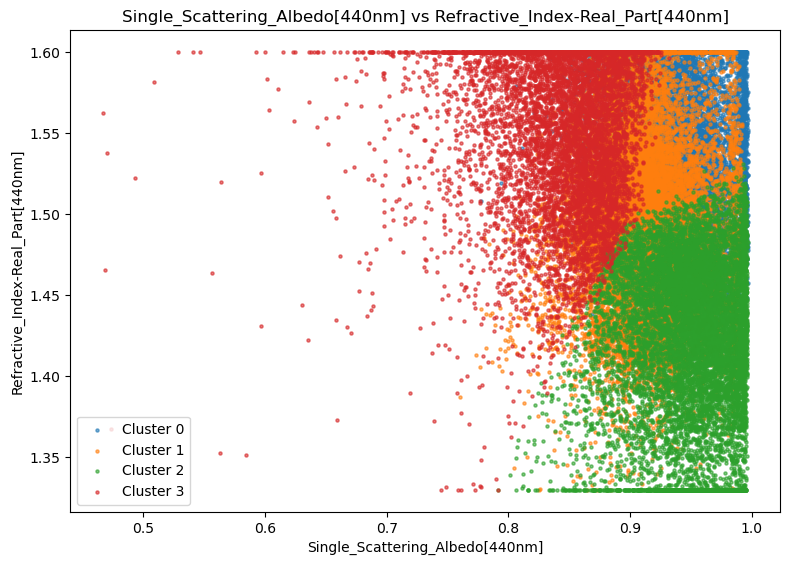

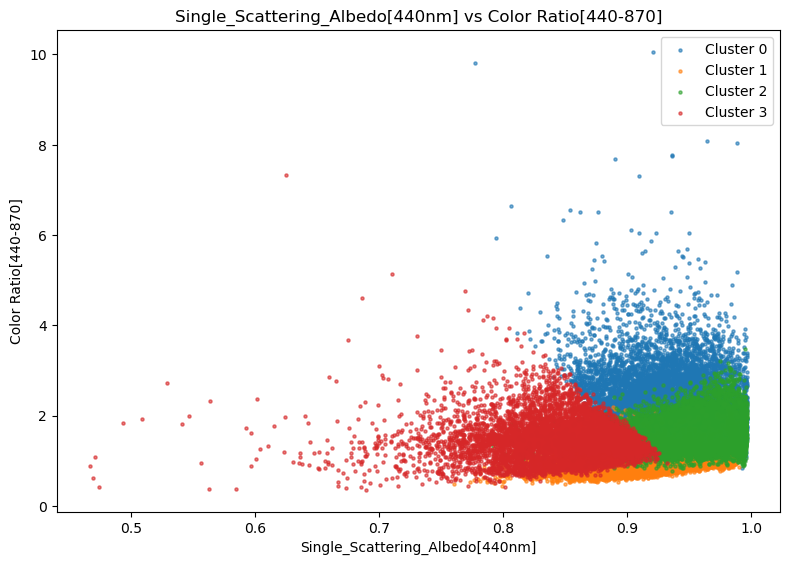

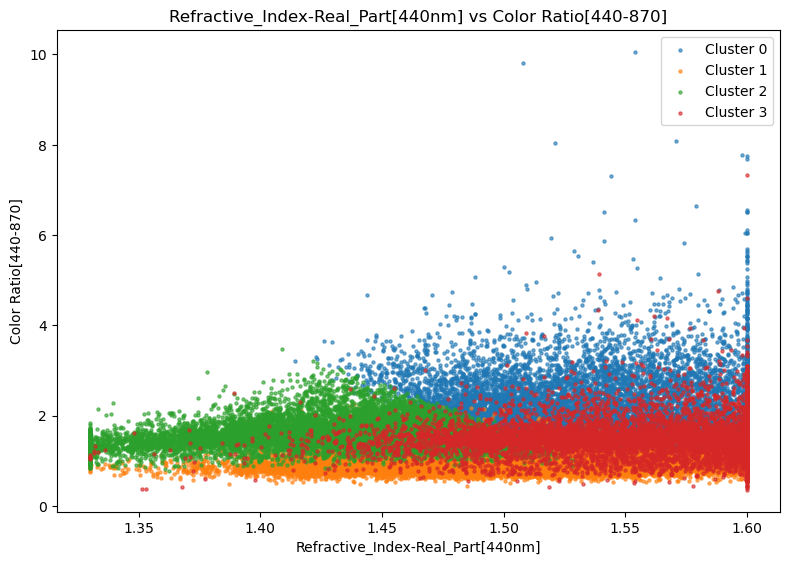

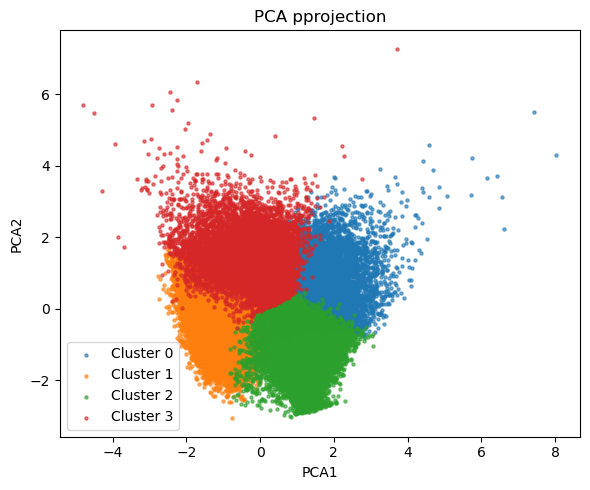

In [6]:
# CRTANJE 2D SCATTER PLOTOVA ZA SVE KOMBINACIJE PARAMETARA

# kolone koje koristim
cols = [
    "Extinction_Angstrom_Exponent_440-870nm-Total",
    "Single_Scattering_Albedo[440nm]",
    "Refractive_Index-Real_Part[440nm]",
    "Color Ratio[440-870]"
]

# scatter plot za sve kombinacije parametara
pairs = list(itertools.combinations(cols, 2))  # sve kombinacije po 2

for xcol, ycol in pairs:
    plt.figure(figsize=(8,6))  # veća figura
    for cluster in sorted(data_clean['cluster'].unique()):
        subset = data_clean[data_clean['cluster'] == cluster]
        plt.scatter(subset[xcol], subset[ycol], label=f"Cluster {cluster}", alpha=0.6, s=5)
    plt.xlabel(xcol)
    plt.ylabel(ycol)
    plt.title(f"{xcol} vs {ycol}", fontsize=12)
    plt.legend(loc='best', fontsize=10)
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)  # dodatni prostor za naslov
    
    # Cuvanje slike
    filename = f"{xcol}_vs_{ycol}_k{k_chosen}.png".replace(" ", "_").replace("[", "").replace("]", "")
    filepath = os.path.join(save_folder, filename)
    plt.savefig(filepath, dpi=300)
    
    plt.show()
    
# skaliranje
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clean[cols])


# scatter plot PCA projekcija u 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_scaled)  # koristim standardizovane podatke
data_clean["PCA1"] = X_pca[:, 0]
data_clean["PCA2"] = X_pca[:, 1]

plt.figure(figsize=(6, 5))
for cluster in sorted(data_clean['cluster'].unique()):
    subset = data_clean[data_clean['cluster'] == cluster]
    plt.scatter(subset["PCA1"], subset["PCA2"], label=f"Cluster {cluster}", alpha=0.6, s=5)
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("PCA pprojection")
plt.legend()
plt.tight_layout()
plt.show()


K-means clustering — without color ratio

Dimenzije: (49487, 3)
Prvih 5 redova:


,Extinction_Angstrom_Exponent_440-870nm-Total,Single_Scattering_Albedo[440nm],Refractive_Index-Real_Part[440nm]
0,1.933810,0.9566,1.4094
1,1.843452,0.9900,1.4335
2,1.805762,0.9935,1.4011
3,1.781239,0.9895,1.4366
4,2.008488,0.9951,1.4514



Osnovna statistika:


,Extinction_Angstrom_Exponent_440-870nm-Total,Single_Scattering_Albedo[440nm],Refractive_Index-Real_Part[440nm]
count,49487.000000,49487.000000,49487.000000
mean,1.107367,0.914520,1.498396
std,0.630821,0.048607,0.065467
min,-0.082898,0.466500,1.330000
25%,0.500425,0.887950,1.455800
50%,1.207846,0.916900,1.497400
75%,1.691796,0.948500,1.547000
max,2.345562,0.996800,1.600000


ima li nan vrednosti: False
dimenzije podataka: (49487, 3)

Skewness svakog atributa:
Extinction_Angstrom_Exponent_440-870nm-Total   -0.187543
Single_Scattering_Albedo[440nm]                -0.939057
Refractive_Index-Real_Part[440nm]              -0.305031
dtype: float64
Broj iteracija za k = 2 : 4
Broj iteracija za k = 3 : 11
Broj iteracija za k = 4 : 13
Broj iteracija za k = 5 : 15
Broj iteracija za k = 6 : 31
Broj iteracija za k = 7 : 41
Broj iteracija za k = 8 : 76
Broj iteracija za k = 9 : 25
Broj iteracija za k = 10 : 43


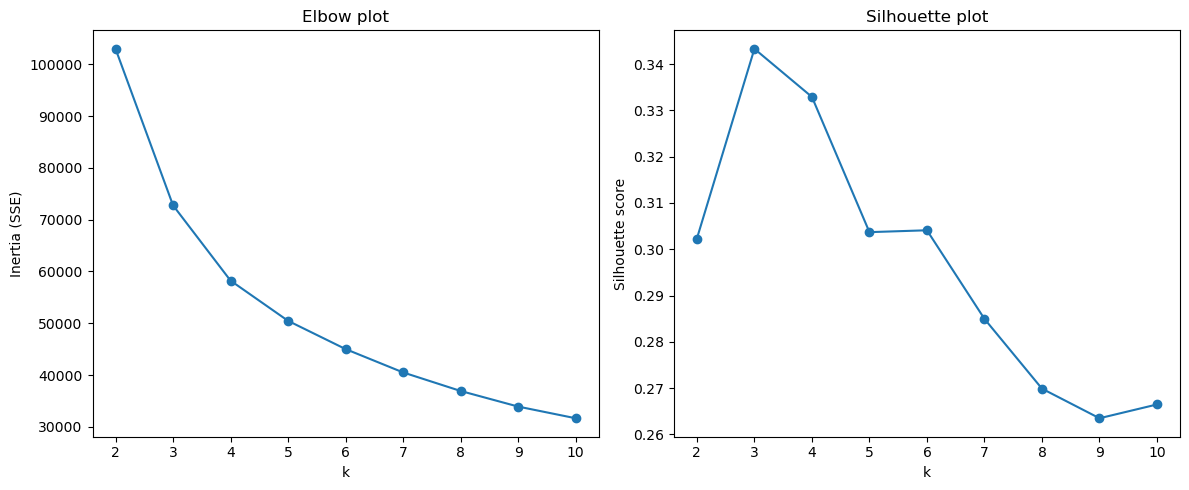

Inertias: [(2, np.float64(103008.48)), (3, np.float64(72768.89)), (4, np.float64(58230.36)), (5, np.float64(50464.53)), (6, np.float64(45010.22)), (7, np.float64(40500.74)), (8, np.float64(36918.67)), (9, np.float64(33905.49)), (10, np.float64(31649.06))]
Silhouette: [(2, np.float64(0.302)), (3, np.float64(0.343)), (4, np.float64(0.333)), (5, np.float64(0.304)), (6, np.float64(0.304)), (7, np.float64(0.285)), (8, np.float64(0.27)), (9, np.float64(0.263)), (10, np.float64(0.266))]
Broj iteracija za finalni model: 11

Broj članova po klasteru:
cluster
0    16838
1    17948
2    14701
Name: count, dtype: int64

Centri klastera (u originalnim jedinicama):


,Extinction_Angstrom_Exponent_440-870nm-Total,Single_Scattering_Albedo[440nm],Refractive_Index-Real_Part[440nm]
0,1.663079,0.949965,1.457509
1,0.409583,0.913021,1.485515
2,1.321762,0.875789,1.560877



=== Statistika za klaster 0 ===


,Parametar,Median,Mean ± Std,Mode (Value of maximum frequency),Range
0,Extinction_Angstrom_Exponent_440-870nm-Total,1.705,1.66 ± 0.26,1.807,0.64 – 2.35
1,Single_Scattering_Albedo[440nm],0.953,0.95 ± 0.03,0.994,0.77 – 1.00
2,Refractive_Index-Real_Part[440nm],1.464,1.46 ± 0.06,1.330,1.33 – 1.60



=== Statistika za klaster 1 ===


,Parametar,Median,Mean ± Std,Mode (Value of maximum frequency),Range
0,Extinction_Angstrom_Exponent_440-870nm-Total,0.362,0.41 ± 0.25,0.114,-0.08 – 1.44
1,Single_Scattering_Albedo[440nm],0.911,0.91 ± 0.03,0.910,0.74 – 0.99
2,Refractive_Index-Real_Part[440nm],1.484,1.49 ± 0.05,1.600,1.33 – 1.60



=== Statistika za klaster 2 ===


,Parametar,Median,Mean ± Std,Mode (Value of maximum frequency),Range
0,Extinction_Angstrom_Exponent_440-870nm-Total,1.375,1.32 ± 0.43,0.513,-0.04 – 2.29
1,Single_Scattering_Albedo[440nm],0.881,0.88 ± 0.05,0.910,0.47 – 0.99
2,Refractive_Index-Real_Part[440nm],1.570,1.56 ± 0.04,1.600,1.33 – 1.60


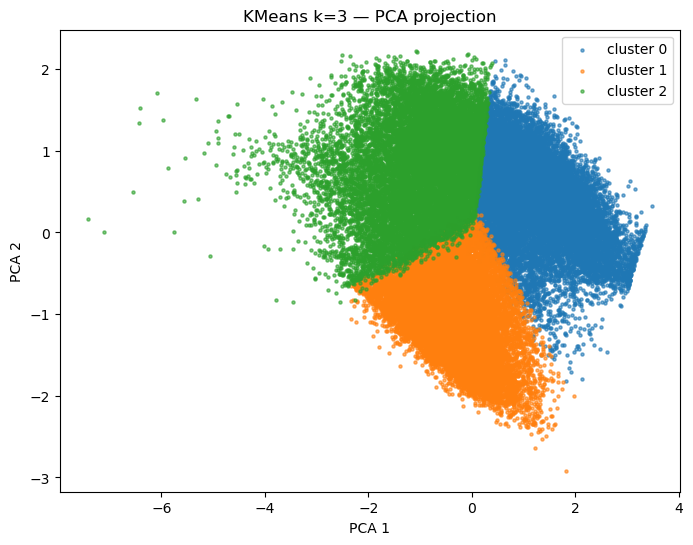

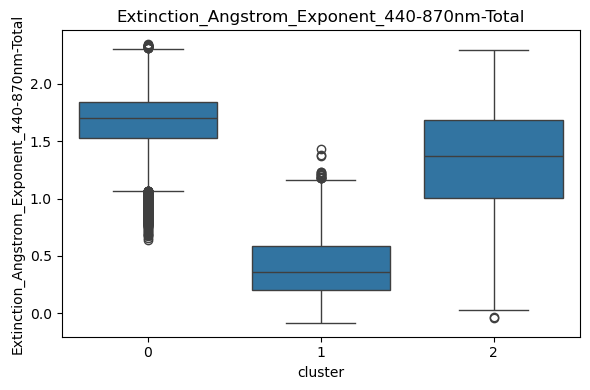

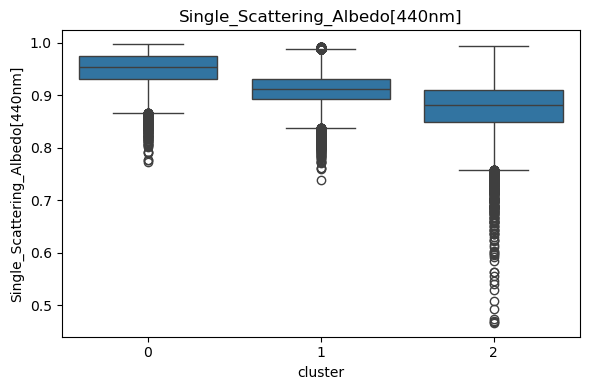

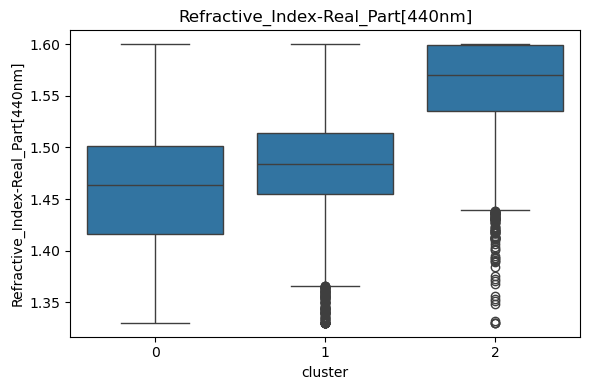

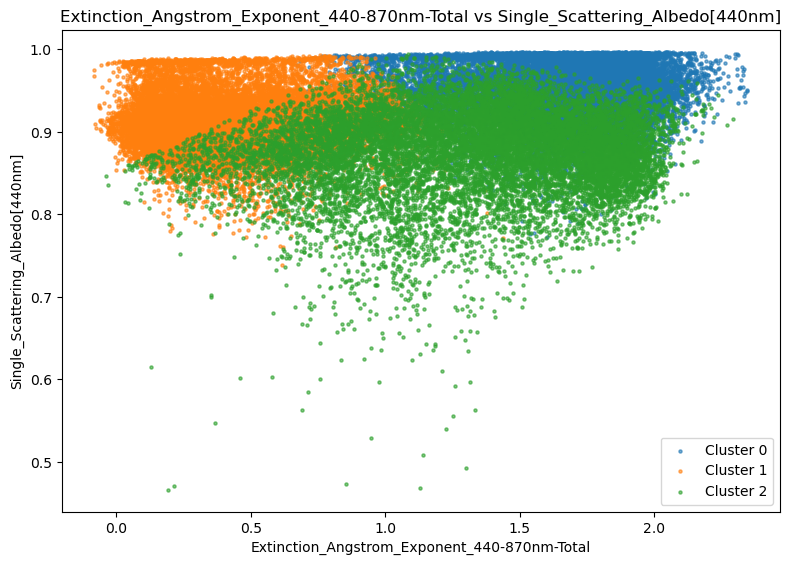

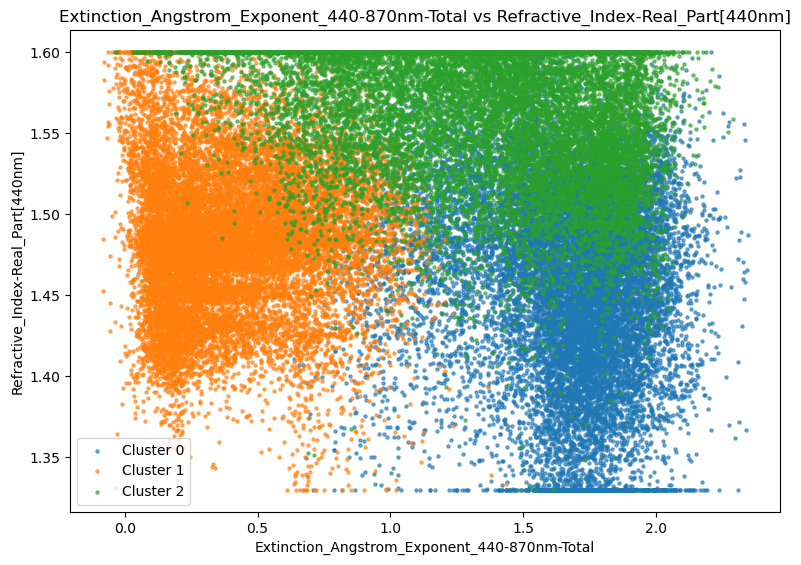

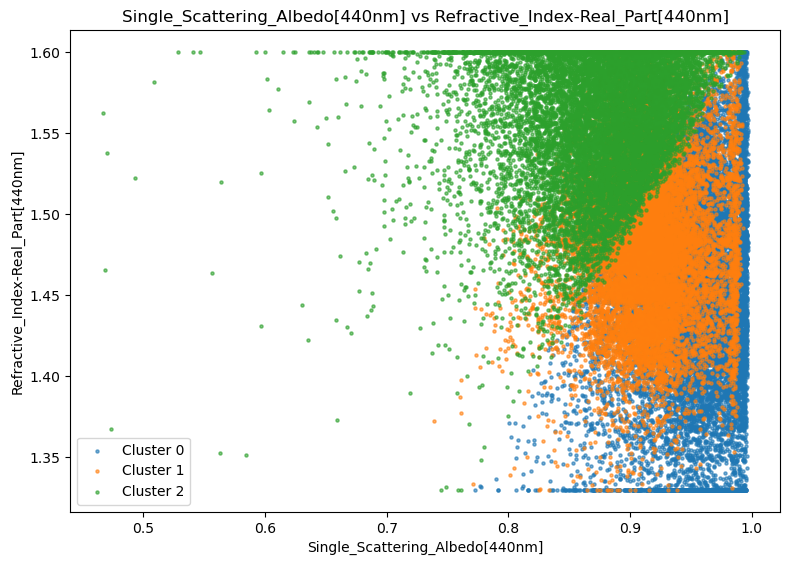

In [7]:
# UCITAVANJE
fn = "AllStations_4params_with_station.ods"
df = pd.read_excel(fn, engine="odf")

# kolone koje cu koristiti
cols = [
    "Extinction_Angstrom_Exponent_440-870nm-Total",
    "Single_Scattering_Albedo[440nm]",
    "Refractive_Index-Real_Part[440nm]"
]

# provera da li kolone postoje
missing = [c for c in cols if c not in df.columns]
if missing:
    raise KeyError(f"Nedostaju kolone u fajlu: {missing}")

data = df[cols].copy()
print("Dimenzije:", data.shape)
print("Prvih 5 redova:")
display(data.head())

# Brza EDA (Exploratory Data Analysis)
print("\nOsnovna statistika:")
display(data.describe())

# provera da li postoje nan
print("ima li nan vrednosti:", data.isna().any().any())

# kopija podataka za dalju obradu
data_clean = data.copy()
print("dimenzije podataka:", data_clean.shape)

print("\nSkewness svakog atributa:")
print(data_clean.skew())

# skaliranje
scaler = StandardScaler()
X = scaler.fit_transform(data_clean.values)

# odabir k (elbow + silhouette) 
ks = list(range(2, 11))
inertias = []
sil_scores = []

for k in ks:
    kmeans = KMeans(n_clusters=k, n_init=20, random_state=42, max_iter=500)
    labels = kmeans.fit_predict(X)
    print("Broj iteracija za k =", k, ":", kmeans.n_iter_)
    inertias.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X, labels))

# folder za cuvanje slika
save_folder = "kmeans images k3 bez CR PROSIRENO"
os.makedirs(save_folder, exist_ok=True)


# plot elbow i silhouette
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(ks, inertias, '-o')
plt.xlabel('k')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow plot')

plt.subplot(1,2,2)
plt.plot(ks, sil_scores, '-o')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('Silhouette plot')
plt.tight_layout()

elbow_silhouette_fig = f"Elbow_plot_and_Silhouette_score_k3.png"
plt.savefig(os.path.join(save_folder, elbow_silhouette_fig), dpi=300)

plt.show()

print("Inertias:", list(zip(ks, np.round(inertias,2))))
print("Silhouette:", list(zip(ks, np.round(sil_scores,3))))

# pokretanje KMeans sa izabranim k 
k_chosen = 3  

kmeans = KMeans(n_clusters=k_chosen, n_init=50, random_state=42, max_iter=1000)
labels = kmeans.fit_predict(X)
print("Broj iteracija za finalni model:", kmeans.n_iter_)
data_clean = data_clean.reset_index(drop=True)
data_clean['cluster'] = labels

print("\nBroj članova po klasteru:")
print(data_clean['cluster'].value_counts().sort_index())

centers_scaled = kmeans.cluster_centers_
centers_orig = scaler.inverse_transform(centers_scaled)
centers_df = pd.DataFrame(centers_orig, columns=cols)
print("\nCentri klastera (u originalnim jedinicama):")
display(centers_df)



# statistika po klasterima, reorganizovano po klasterima
cluster_stats = {}

for cl in sorted(data_clean["cluster"].unique()):
    rows = []
    for c in cols:
        vals = data_clean.loc[data_clean["cluster"] == cl, c]
        mean = vals.mean()
        std = vals.std()
        median = vals.median()
        minv = vals.min()
        maxv = vals.max()
        r = maxv - minv
        mode_vals = vals.mode()
        mode_val = mode_vals.iloc[0] if not mode_vals.empty else np.nan

        rows.append({
            "Parametar": c,
            "Median": round(median, 3),
            "Mean ± Std": f"{mean:.2f} ± {std:.2f}",
            "Mode (Value of maximum frequency)": round(mode_val, 3),
            "Range": f"{minv:.2f} – {maxv:.2f}"
        })
    cluster_stats[cl] = pd.DataFrame(rows)

# prikaz za svaki klaster
for cl, tbl in cluster_stats.items():
    print(f"\n=== Statistika za klaster {cl} ===")
    display(tbl)




# vizualizacija (PCA u 2D)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
for c in sorted(data_clean['cluster'].unique()):
    mask = data_clean['cluster'] == c
    plt.scatter(X_pca[mask,0], X_pca[mask,1], label=f'cluster {c}', alpha=0.6, s=5)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title(f'KMeans k={k_chosen} — PCA projection')
plt.legend()

pca_filename = f"PCA_k{k_chosen}.png"
plt.savefig(os.path.join(save_folder, pca_filename), dpi=300)

plt.show()

# boxplot po klasterima
for col in cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='cluster', y=col, data=data_clean)
    plt.title(f'{col}')
    plt.tight_layout()

    boxplot_filename = f"Boxplot_{col.replace(' ', '_').replace('[','').replace(']','')}_k{k_chosen}.png"
    plt.savefig(os.path.join(save_folder, boxplot_filename), dpi=300)
    
    plt.show()

# scatter plot svih parova kolona po klasterima

pairs = list(itertools.combinations(cols, 2))  # sve kombinacije po 2 kolone

for xcol, ycol in pairs:
    plt.figure(figsize=(8,6))
    for cluster in sorted(data_clean['cluster'].unique()):
        subset = data_clean[data_clean['cluster'] == cluster]
        plt.scatter(subset[xcol], subset[ycol], label=f'Cluster {cluster}', alpha=0.6, s=5)
    plt.xlabel(xcol)
    plt.ylabel(ycol)
    plt.title(f"{xcol} vs {ycol}")
    plt.legend(loc='best', fontsize=10)
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)  # dodatni prostor za naslov

    filename = f"{xcol}_vs_{ycol}_k{k_chosen}.png".replace(" ", "_").replace("[", "").replace("]", "")
    filepath = os.path.join(save_folder, filename)
    plt.savefig(filepath, dpi=300)
    
    plt.show()

# snimanje rezultata 
#output_fn = "kmeans3paramAllStations_bez_CR.ods"
#data_with_clusters = df.loc[data_clean.index, :].copy()
#data_with_clusters['cluster'] = data_clean['cluster'].values
#data_with_clusters.to_excel(output_fn, engine="odf", index=False)
#print(f"\nsnimljeno: {output_fn}")


k=3

In [ ]:
# UCITAVANJE
fn = "AllStations_4params_with_station.ods"
df = pd.read_excel(fn, engine="odf")

# kolone koje cu koristiti
cols = [
    "Extinction_Angstrom_Exponent_440-870nm-Total",
    "Single_Scattering_Albedo[440nm]",
    "Refractive_Index-Real_Part[440nm]",
    "Color Ratio[440-870]"
]

# provera da li kolone postoje
missing = [c for c in cols if c not in df.columns]
if missing:
    raise KeyError(f"Nedostaju kolone u fajlu: {missing}")

data = df[cols].copy()
print("Dimenzije:", data.shape)
print("Prvih 5 redova:")
display(data.head())

# Brza EDA (Exploratory Data Analysis)
print("\nOsnovna statistika:")
display(data.describe())

# provera da li postoje nan
print("ima li nan vrednosti:", data.isna().any().any())

# kopija podataka za dalju obradu
data_clean = data.copy()
print("dimenzije podataka:", data_clean.shape)

print("\nSkewness svakog atributa:")
print(data_clean.skew())

# skaliranje
scaler = StandardScaler()
X = scaler.fit_transform(data_clean.values)

# folder za cuvanje slika
save_folder = "kmeans images k3 PROSIRENO"
os.makedirs(save_folder, exist_ok=True)



# pokretanje KMeans sa izabranim k 
k_chosen = 3  

kmeans = KMeans(n_clusters=k_chosen, n_init=50, random_state=42, max_iter=1000)
labels = kmeans.fit_predict(X)
print("Broj iteracija za finalni model:", kmeans.n_iter_)
data_clean = data_clean.reset_index(drop=True)
data_clean['cluster'] = labels

print("\nBroj članova po klasteru:")
print(data_clean['cluster'].value_counts().sort_index())

centers_scaled = kmeans.cluster_centers_
centers_orig = scaler.inverse_transform(centers_scaled)
centers_df = pd.DataFrame(centers_orig, columns=cols)
print("\nCentri klastera (u originalnim jedinicama):")
display(centers_df)



# statistika po klasterima, reorganizovano po klasterima
cluster_stats = {}

for cl in sorted(data_clean["cluster"].unique()):
    rows = []
    for c in cols:
        vals = data_clean.loc[data_clean["cluster"] == cl, c]
        mean = vals.mean()
        std = vals.std()
        median = vals.median()
        minv = vals.min()
        maxv = vals.max()
        r = maxv - minv
        mode_vals = vals.mode()
        mode_val = mode_vals.iloc[0] if not mode_vals.empty else np.nan

        rows.append({
            "Parametar": c,
            "Median": round(median, 3),
            "Mean ± Std": f"{mean:.2f} ± {std:.2f}",
            "Mode (Value of maximum frequency)": round(mode_val, 3),
            "Range": f"{minv:.2f} – {maxv:.2f}"
        })
    cluster_stats[cl] = pd.DataFrame(rows)

# prikaz za svaki klaster
for cl, tbl in cluster_stats.items():
    print(f"\n=== Statistika za klaster {cl} ===")
    display(tbl)




# vizualizacija (PCA u 2D)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
for c in sorted(data_clean['cluster'].unique()):
    mask = data_clean['cluster'] == c
    plt.scatter(X_pca[mask,0], X_pca[mask,1], label=f'cluster {c}', alpha=0.6, s=5)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title(f'KMeans k={k_chosen} — PCA projection')
plt.legend()

pca_filename = f"PCA_k{k_chosen}.png"
plt.savefig(os.path.join(save_folder, pca_filename), dpi=300)

plt.show()

# boxplot po klasterima
for col in cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='cluster', y=col, data=data_clean)
    plt.title(f'{col}')
    plt.tight_layout()

    boxplot_filename = f"Boxplot_{col.replace(' ', '_').replace('[','').replace(']','')}_k{k_chosen}.png"
    plt.savefig(os.path.join(save_folder, boxplot_filename), dpi=300)
    
    plt.show()

# scatter plot svih parova kolona po klasterima

pairs = list(itertools.combinations(cols, 2))  # sve kombinacije po 2 kolone

for xcol, ycol in pairs:
    plt.figure(figsize=(8,6))
    for cluster in sorted(data_clean['cluster'].unique()):
        subset = data_clean[data_clean['cluster'] == cluster]
        plt.scatter(subset[xcol], subset[ycol], label=f'Cluster {cluster}', alpha=0.6, s=5)
    plt.xlabel(xcol)
    plt.ylabel(ycol)
    plt.title(f"{xcol} vs {ycol}")
    plt.legend(loc='best', fontsize=10)
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)  # dodatni prostor za naslov

    filename = f"{xcol}_vs_{ycol}_k{k_chosen}.png".replace(" ", "_").replace("[", "").replace("]", "")
    filepath = os.path.join(save_folder, filename)
    plt.savefig(filepath, dpi=300)
    
    plt.show()

# snimanje rezultata 
#output_fn = "kmeans3paramAllStations.ods"
#data_with_clusters = df.loc[data_clean.index, :].copy()
#data_with_clusters['cluster'] = data_clean['cluster'].values
#data_with_clusters.to_excel(output_fn, engine="odf", index=False)
#print(f"\nsnimljeno: {output_fn}")
